In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

# json
import json

In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("spotify_dataset.csv", index_col=0)
#df.drop("Unamed : 0" , axis=1 , inplace = True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


**Load Dataset**

In [15]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [20]:
df.shape

(2017, 16)

In [22]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


**Data Analysis**

Top 5 most popular artists

In [5]:
# top_five_artist = df.groupby('artist').count().sort_values(by ='song_title' , ascending = False)
top_five_artist = df.groupby('artist')['song_title'].count().sort_values(ascending = False).head()
top_five_artist

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

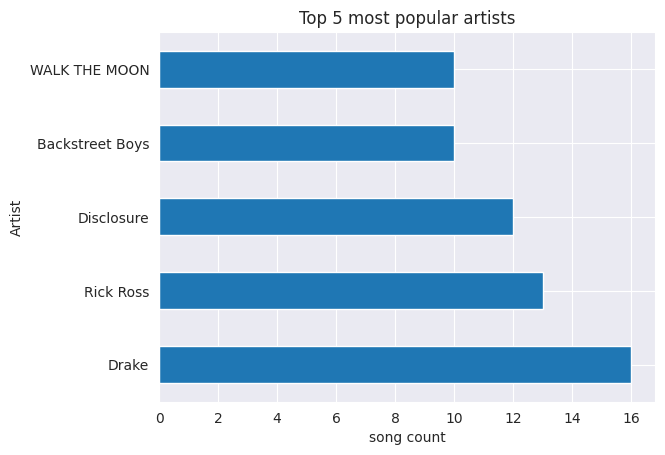

In [6]:
top_five_artist.plot.barh()
plt.title('Top 5 most popular artists')
plt.xlabel('song count')
plt.ylabel('Artist')
plt.show()

Top 5 loudest tracks

In [7]:
top_five_loudest_tracks = df[['loudness' , 'song_title']].sort_values(by = 'loudness' , ascending  = True)[:5]
# top_five_loudest_tracks['loudness'] = top_five_loudest_tracks['loudness'].astype(int)
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


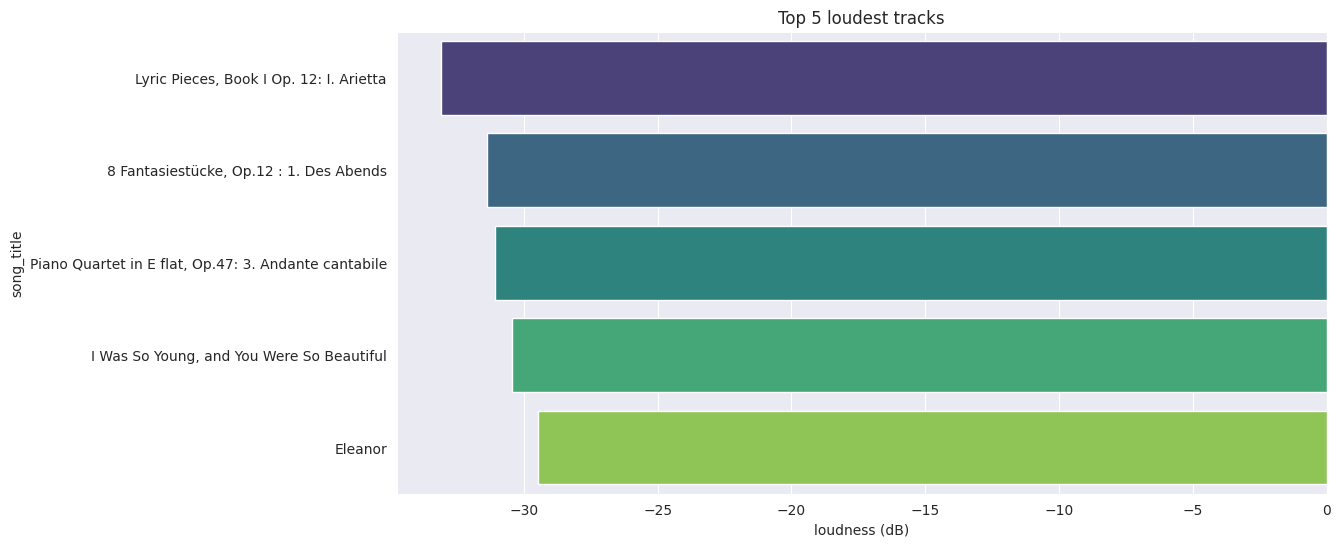

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_five_loudest_tracks , x='loudness' , y= 'song_title' , palette = 'viridis')
plt.title('Top 5 loudest tracks')
plt.xlabel('loudness (dB)')
plt.show()

**Artists with most danceability songs**


In [15]:
top_five_danceability_song = df[['danceability' , 'song_title' , 'artist']].sort_values(by = 'danceability' , ascending  = False)[:5]
top_five_danceability_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


Text(0.5, 1.0, 'top 5 Artists with most danceability songs')

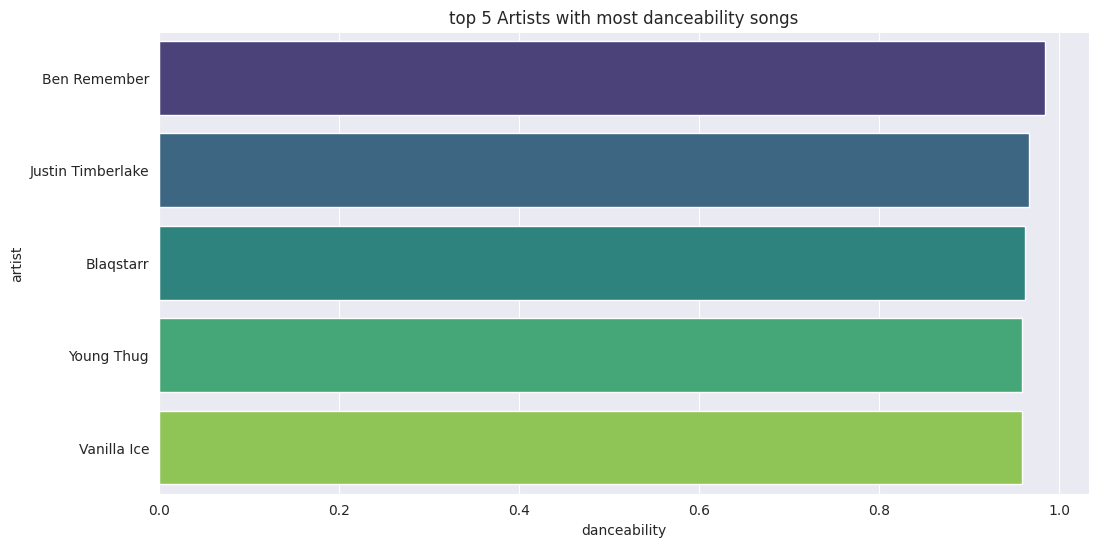

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='danceability' , y='artist' , data=top_five_danceability_song, palette = 'viridis')
plt.title('top 5 Artists with most danceability songs')
plt.show()

**Top 10 instrumental tracks**

In [18]:
top_ten_instrumental_tracks = df[['instrumentalness','song_title','artist']].sort_values(by = 'instrumentalness' , ascending  = False)[:10]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


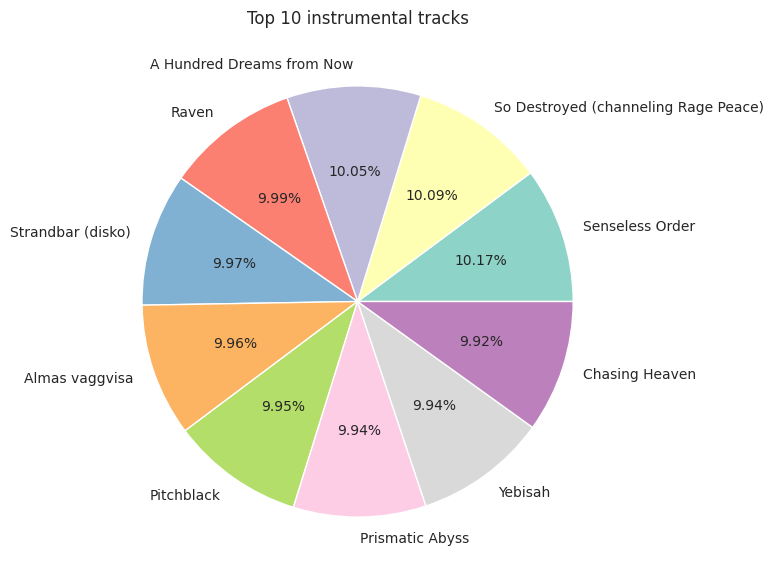

In [30]:
sns.set_palette("Set3")
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness' , data = top_ten_instrumental_tracks , autopct='%1.2f%%' , labels=top_ten_instrumental_tracks.song_title , shadow=False)
plt.title('Top 10 instrumental tracks')
plt.show()

###Multiple Feature Plot


In [62]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [33]:
feature_col_filter = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']

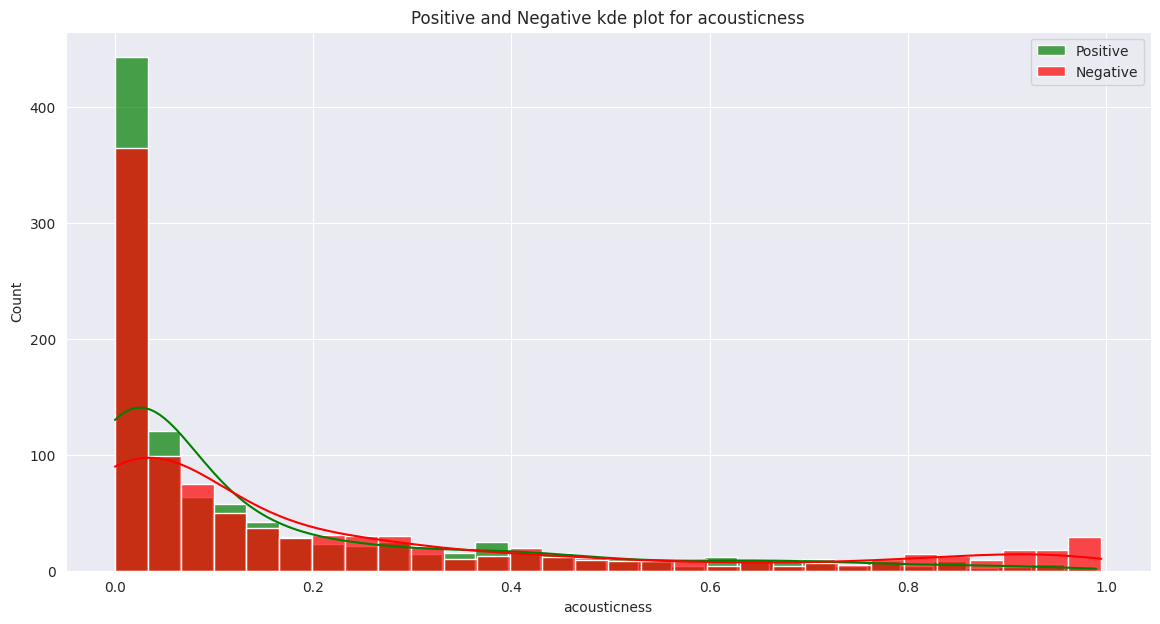

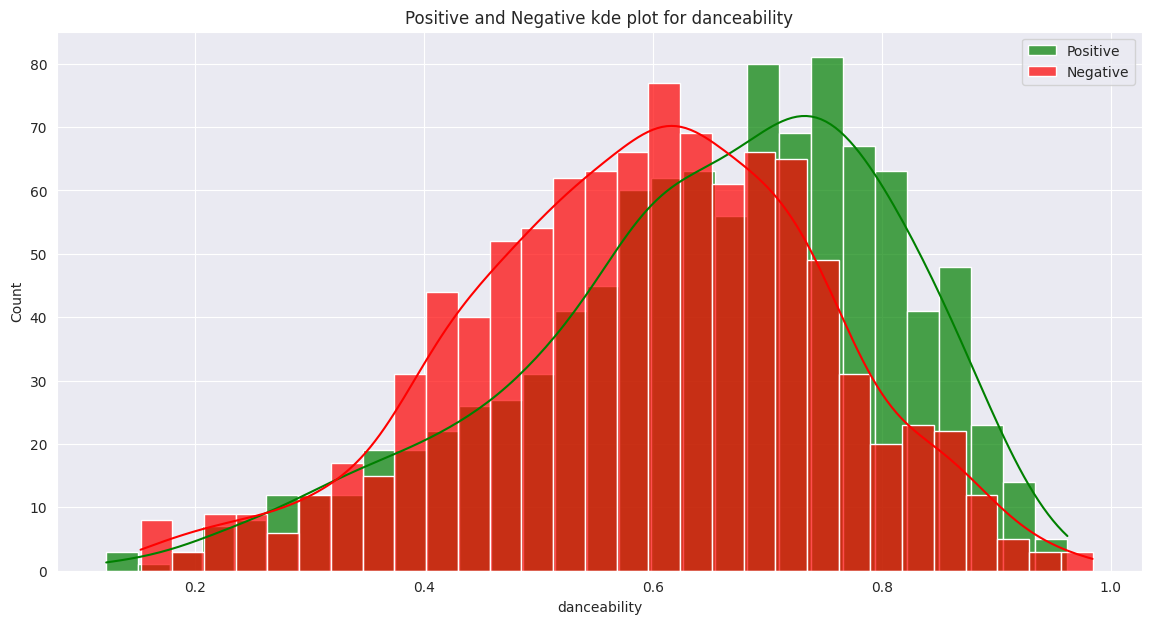

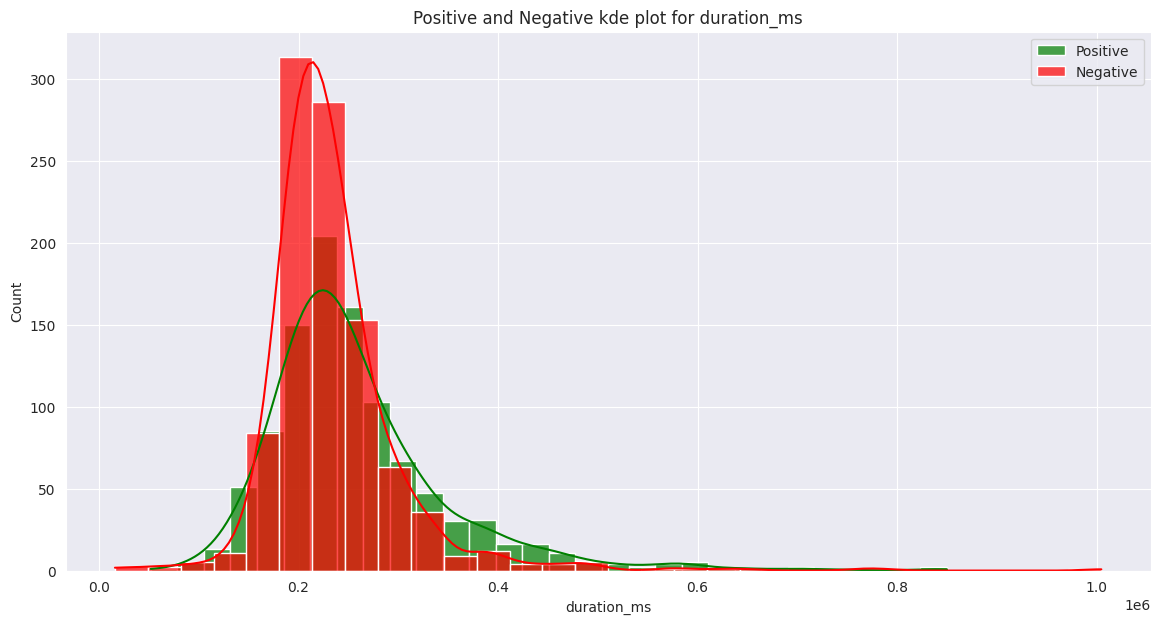

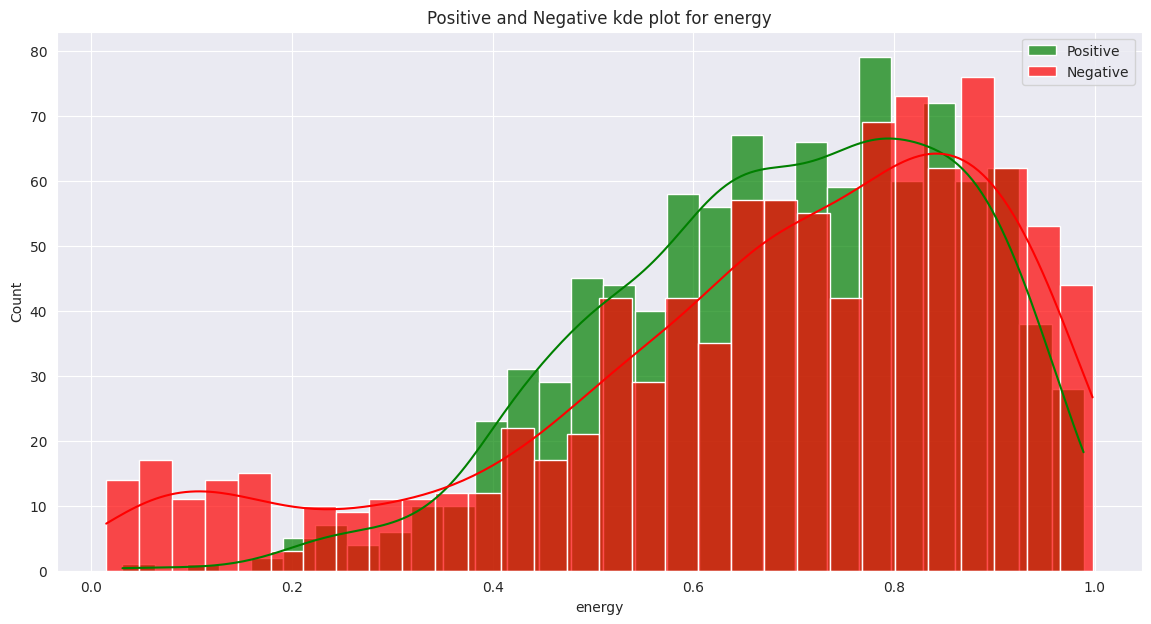

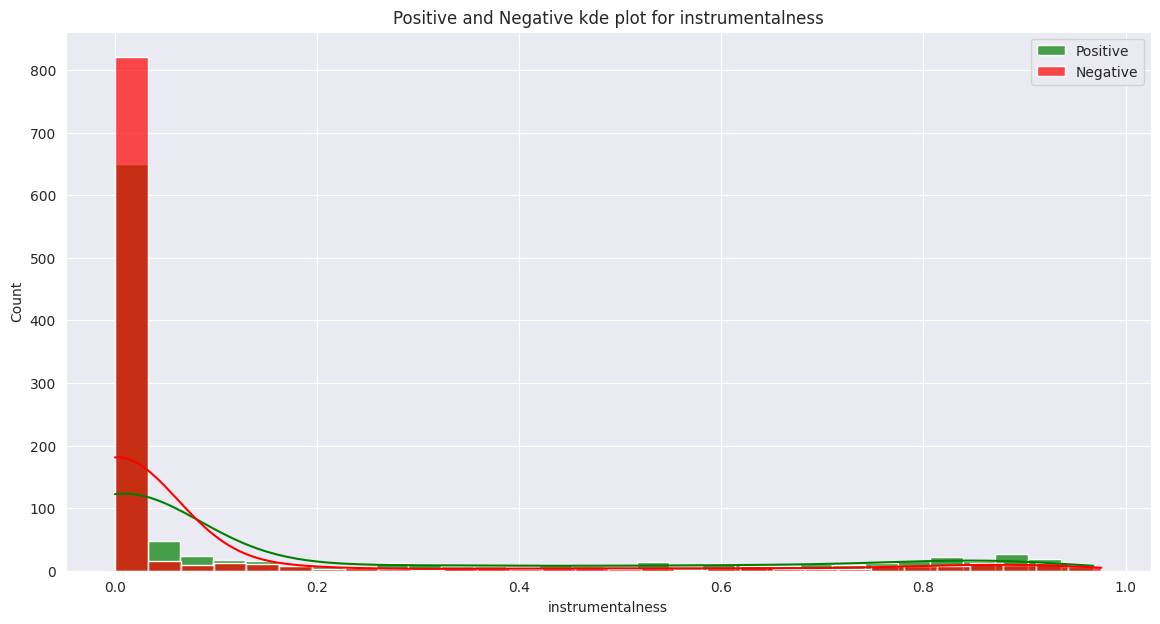

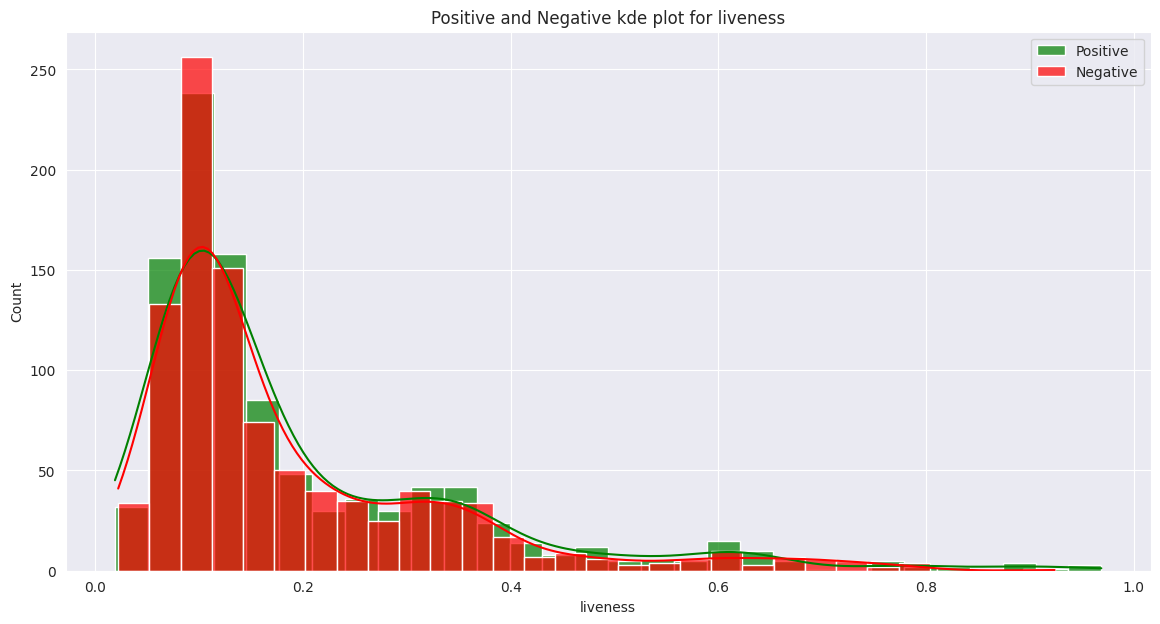

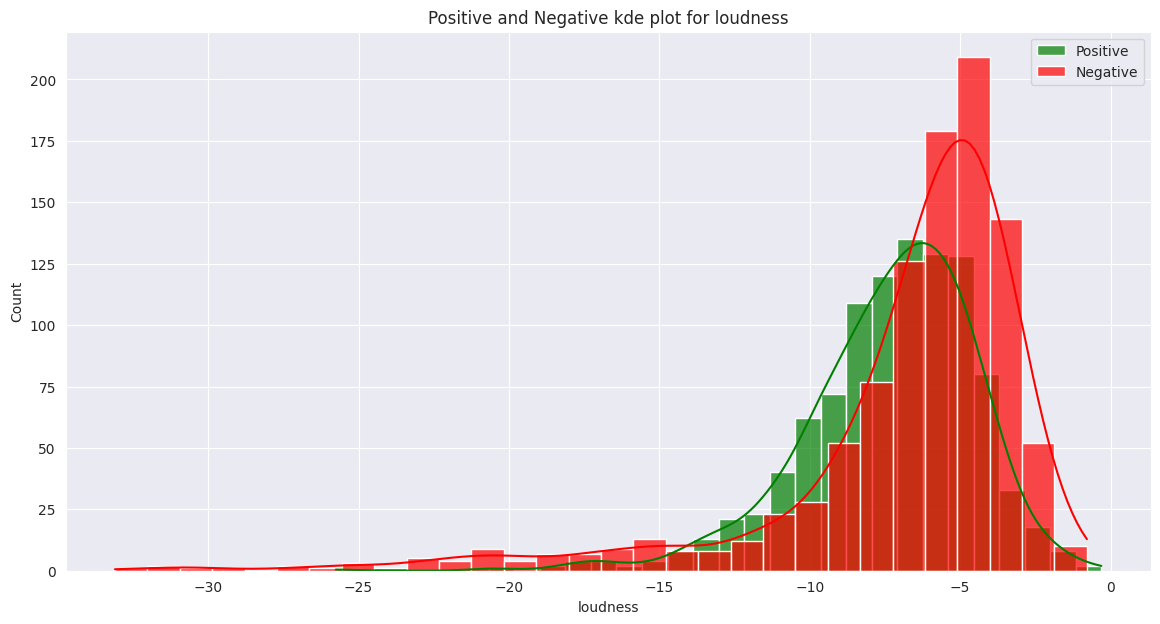

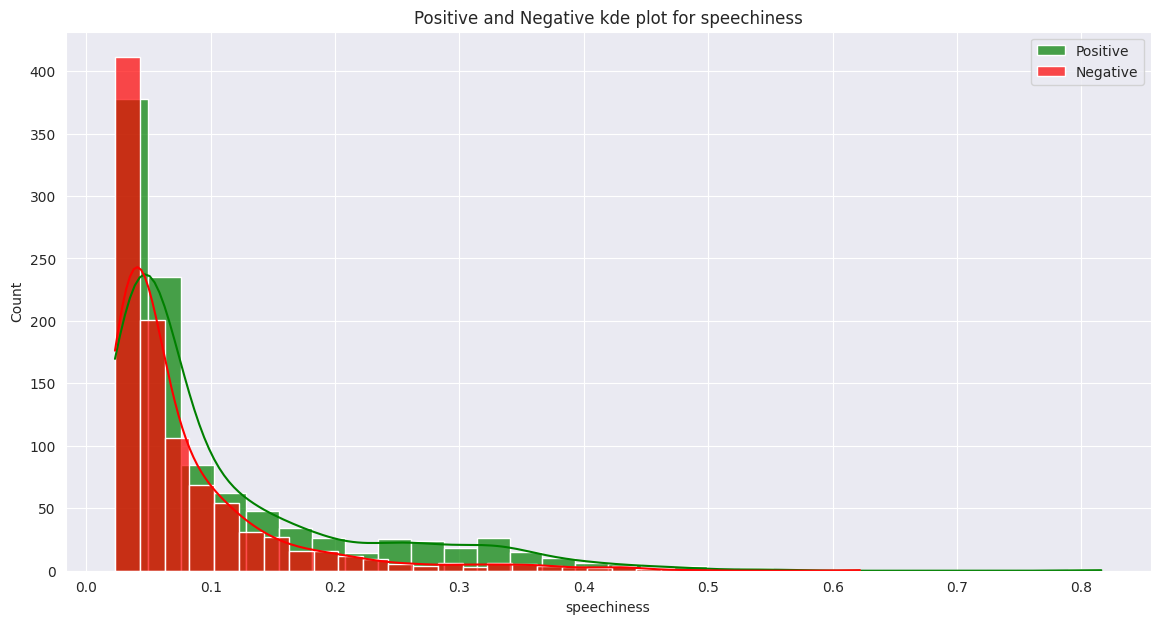

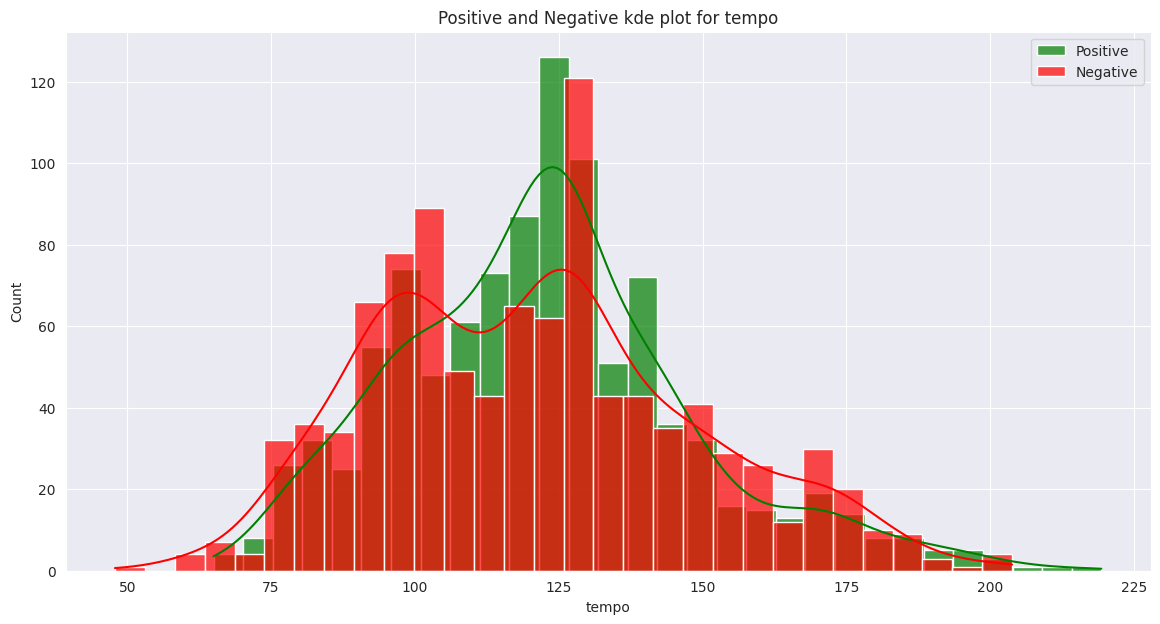

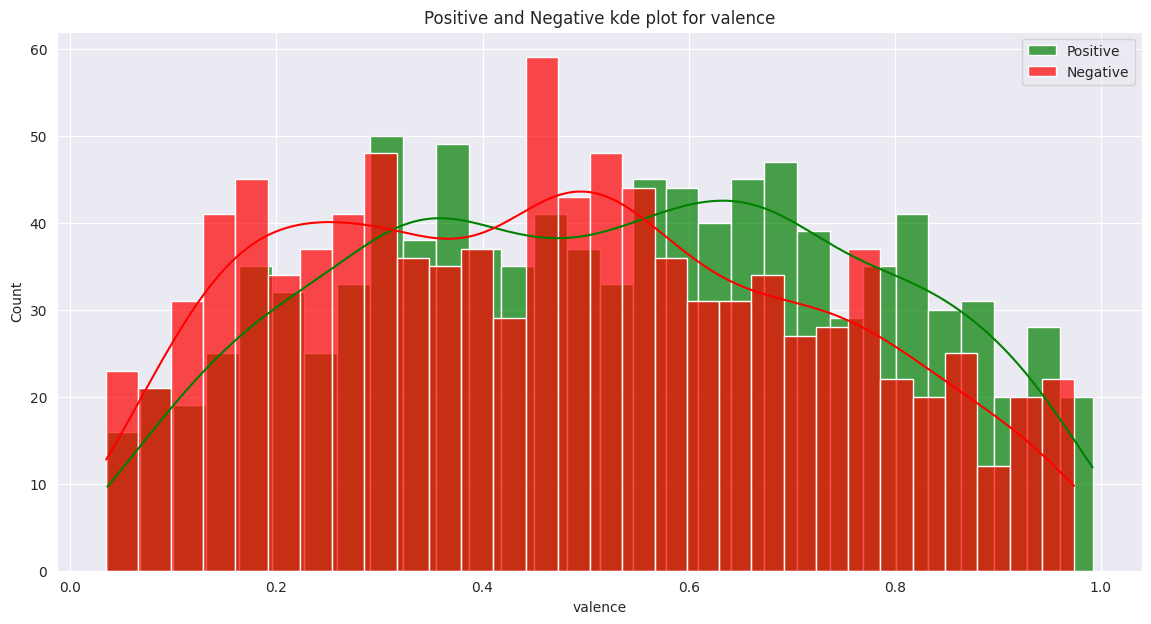

In [78]:
# Loop through each feature column
for col in feature_col_filter:
    plt.figure(figsize=(14, 7))
    pos_data = df[df['target'] == 1][col]
    neg_data = df[df['target'] == 0][col]

    # Plot histograms for positive and negative data
    sns.histplot(data=pos_data, bins=30, label=f'Positive', color='green', alpha=0.7, kde=True)
    sns.histplot(data=neg_data, bins=30, label=f'Negative', color='red', alpha=0.7, kde=True)

    # sns.kdeplot(data=pos_data,label=f'Positive - {col}', color='green', alpha=0.7 , shade=True,lw=2, linestyle='-', fill=True)
    # sns.kdeplot(data=neg_data,label=f'Negative - {col}', color='red', alpha=0.7 , shade=True,lw=2, linestyle='-', fill=True)

    # Add legend and title
    plt.legend(loc='upper right')
    plt.title(f'Positive and Negative kde plot for {col}')
    plt.show()


##Most common duration


In [71]:
most_common_duration = df['duration_ms'].value_counts(sort=True)[:5]
most_common_duration

192000    5
243493    3
206013    3
228467    3
240000    3
Name: duration_ms, dtype: int64

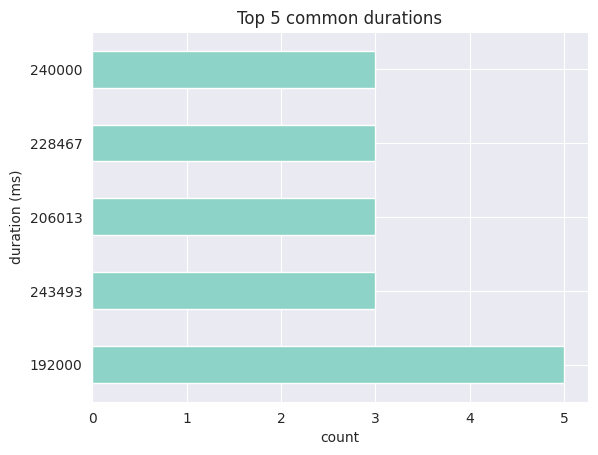

In [75]:
most_common_duration.plot.barh()
plt.title('Top 5 common durations')
plt.xlabel('count')
plt.ylabel('duration (ms)')
plt.show()

##is acoustic music likeable


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='target', ylabel='acousticness'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


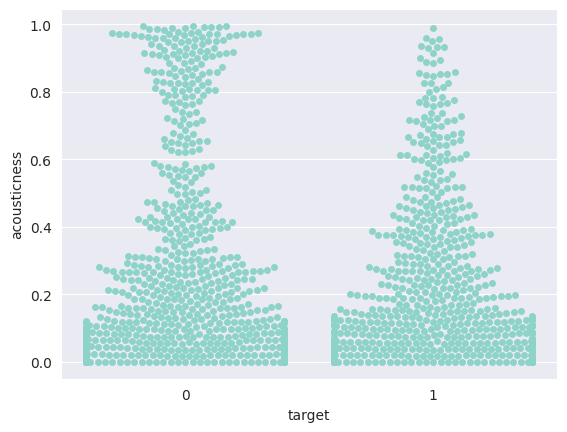

In [77]:
sns.swarmplot(x='target',y='acousticness',data=df)